**ASSIGNMENT GLOBAL C02 EMISSIONS OVER THE SPAN OF MULTIPLE YEARS**

---




Data imported from Wikipedia. Raw Data

In [1]:
import pandas as pd
from google.colab import data_table
data_table.enable_dataframe_formatter()
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions", thousands = ',')
global_co2_emissions = tables[1]
global_co2_emissions 


Country[20]  ...   2018 CO2 emissions[21]
                        Country[20]  ... Total excluding LUCF[23]
0                             World  ...                 35247.21
1    World – International Aviation  ...                      NaN
2    World – International Shipping  ...                      NaN
3                       Afghanistan  ...                     7.44
4                           Albania  ...                     5.56
..                              ...  ...                      ...
207                         Vietnam  ...                   257.86
208                  Western Sahara  ...                      NaN
209                           Yemen  ...                     9.31
210                          Zambia  ...                     7.74
211                        Zimbabwe  ...                    12.27

[212 rows x 10 columns]

Renaming the columns to avoid a multiIndex table.

In [2]:
global_co2_emissions.columns = ['country', 'co2_1990','co2_2005','co2_2017','perc_world', 'change_perc_90to17','per_land_area_17', 'per_capita_17','tot_incl_LUCF_18','tot_excl_LUCF_18']
global_co2_emissions


,country,co2_1990,co2_2005,co2_2017,perc_world,change_perc_90to17,per_land_area_17,per_capita_17,tot_incl_LUCF_18,tot_excl_LUCF_18
0,World,22674.116,30049.809,37077.404,100.00%,63.5%,73.0,4.9,36431.11,35247.21
1,World – International Aviation,258.941,422.777,543.381,1.47%,109.8%,NaN,NaN,NaN,NaN
2,World – International Shipping,371.804,572.169,677.248,1.83%,82.2%,NaN,NaN,NaN,NaN
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
...,...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74


Filtering out the rows that are not countries

In [3]:
global_emissions = global_co2_emissions.loc[((global_co2_emissions.country.str.contains('World')==False) & (global_co2_emissions.country.str.contains('Europe')==False))]
global_emissions


,country,co2_1990,co2_2005,co2_2017,perc_world,change_perc_90to17,per_land_area_17,per_capita_17,tot_incl_LUCF_18,tot_excl_LUCF_18
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74


Importing Numpy en Matplotlib

In [4]:
import matplotlib.pyplot as plt
import numpy as np

DEEL 1

---

Dataframe sorteren naar grootste uitstoters als eerste. Daarna selecteren van 5 grootste uitstoters.

In [5]:
sorted_global_emissions = global_emissions.sort_values('co2_2017', ascending=False)
#print(sorted_global_emissions)
biggest_co2_emission = sorted_global_emissions[0:5]
print(biggest_co2_emission)
#biggest_co2_emission.loc[:,'co2_2017']

           country  co2_1990  ...  tot_incl_LUCF_18  tot_excl_LUCF_18
42           China  2397.048  ...           9663.36          10313.46
202  United States  5085.897  ...           4749.57           4981.30
93           India   605.968  ...           2400.25           2434.52
158         Russia  2378.921  ...           1049.05           1607.55
102          Japan  1149.400  ...           1074.08           1106.15

[5 rows x 10 columns]


Dataframe maken met de juiste kolommen nodig voor de eerste grafiek

In [6]:
df_plot1 = biggest_co2_emission.loc[:,:'co2_2017']
df_plot1

,country,co2_1990,co2_2005,co2_2017
42,China,2397.048,6263.064,10877.218
202,United States,5085.897,5971.571,5107.393
93,India,605.968,1210.754,2454.774
158,Russia,2378.921,1733.950,1764.866
102,Japan,1149.400,1276.863,1320.776


Grafiek 1 the CO2 emissions of the 5 biggest CO2 producers in the world. The x-axis should be the years of 1990, 2005 and 2017.  The y-axis should represent the fossil CO2 emissions in Mt CO2 for the given years.

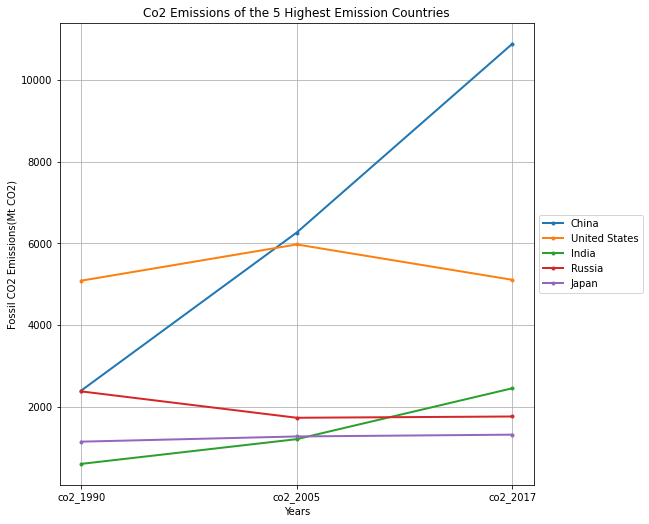

In [7]:
fig, ax = plt.subplots()

years = df_plot1.columns[1:4]

for index, row in df_plot1.iterrows():
 plt.plot(years, row[1:], label=row[0], marker='.', linewidth=2)

plt.title('Co2 Emissions of the 5 Highest Emission Countries')
plt.xlabel('Years')
plt.ylabel('Fossil CO2 Emissions(Mt CO2)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.set_size_inches(8.5, 8.5)
plt.grid()

plt.show()

DEEL 2 A

---



Totale dataframe 

In [8]:
global_emissions

,country,co2_1990,co2_2005,co2_2017,perc_world,change_perc_90to17,per_land_area_17,per_capita_17,tot_incl_LUCF_18,tot_excl_LUCF_18
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74


Adding 3 new columns for the relative change from 1990 to 2005 and the change from 2005 to 2017

In [9]:
global_emissions['change_19to05'] = (global_emissions.loc[:,'co2_2005']/global_emissions.loc[:,'co2_1990'])*100    
global_emissions['change_05to17'] = (global_emissions.loc[:,'co2_2017']/global_emissions.loc[:,'co2_2005'])*100
global_emissions['perc_1990']= 100   
global_emissions['total_change'] = (global_emissions.loc[:,'co2_2017']/global_emissions.loc[:,'co2_1990'])*100            
global_emissions                                                      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,country,co2_1990,co2_2005,co2_2017,perc_world,change_perc_90to17,per_land_area_17,per_capita_17,tot_incl_LUCF_18,tot_excl_LUCF_18,change_19to05,change_05to17,perc_1990,total_change
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44,41.751767,1074.506115,100,448.625295
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56,63.739936,119.780744,100,76.348170
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67,149.515051,162.865464,100,243.508382
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34,273.030251,193.276995,100,527.704666
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN,233.333333,200.000000,100,466.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86,491.680706,220.424061,100,1083.782579
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN,157.638889,121.585903,100,191.666667
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31,316.073762,57.437523,100,181.544940
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74,83.147208,202.157102,100,168.087986


Selecting the needed columns and sorting the values

In [10]:
df_plot2 = global_emissions.loc[:,['country','perc_1990','change_19to05','change_05to17','total_change',]]
df_plot2_sorted = df_plot2.sort_values(by=['total_change'])
df_plot2_sorted

,country,perc_1990,change_19to05,change_05to17,total_change
10,Armenia,100,21.943089,106.384852,23.344123
128,Moldova,100,25.468598,101.523529,25.856620
199,Ukraine,100,45.253380,58.043501,26.266646
141,North Korea,100,60.570167,47.473859,28.754996
76,Georgia,100,14.330119,232.134967,33.265218
...,...,...,...,...,...
37,Cape Verde,100,463.265306,420.704846,1948.979592
197,Turks and Caicos Islands,100,71.428571,3300.000000,2357.142857
62,Equatorial Guinea,100,3475.257732,73.242361,2545.360825
34,Cambodia,100,659.950860,393.149665,2594.594595


Selecting the three worst and the three best changers. 

In [11]:
df_plot2_head = df_plot2.head(3)
df_plot2_tail = df_plot2.tail(3)
frames = [df_plot2_head, df_plot2_tail]
df_plot2_def = pd.concat(frames) 
df_plot2_def

,country,perc_1990,change_19to05,change_05to17,total_change
3,Afghanistan,100,41.751767,1074.506115,448.625295
4,Albania,100,63.739936,119.780744,76.348170
5,Algeria,100,149.515051,162.865464,243.508382
209,Yemen,100,316.073762,57.437523,181.544940
210,Zambia,100,83.147208,202.157102,168.087986
211,Zimbabwe,100,66.294097,106.138040,70.363255


Plotting the results of the three best and worst changers over the years 1990, 2005 and 2017.



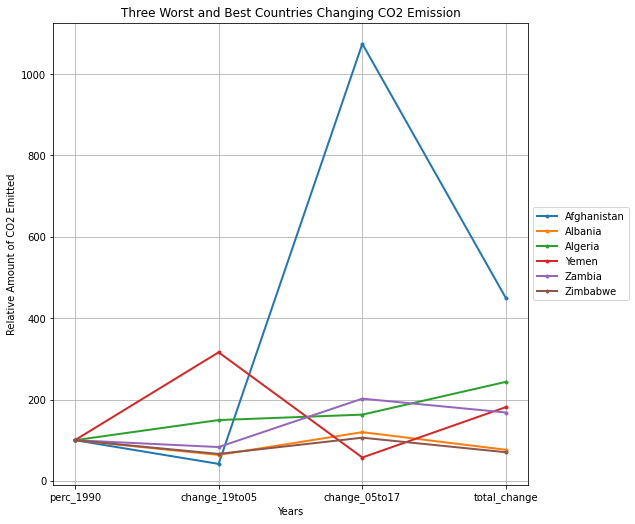

In [12]:
fig, ax = plt.subplots()

years2 = df_plot2_def.columns[1:]

for index, row in df_plot2_def.iterrows():
 plt.plot(years2, row[1:], label=row[0], marker='.', linewidth=2)

plt.title('Three Worst and Best Countries Changing CO2 Emission')
plt.xlabel('Years')
plt.ylabel('Relative Amount of CO2 Emitted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.set_size_inches(8.5, 8.5)
plt.grid()

plt.show()

DEEL 2 B

---



Chart in 2A looks distored because of small countries. Filtering out the small countries with mt CO2 < 5

In [13]:
global_emissions_filt = global_emissions.loc[global_emissions.co2_1990>5]
global_emissions_filt


,country,co2_1990,co2_2005,co2_2017,perc_world,change_perc_90to17,per_land_area_17,per_capita_17,tot_incl_LUCF_18,tot_excl_LUCF_18,change_19to05,change_05to17,perc_1990,total_change
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56,63.739936,119.780744,100,76.348170
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67,149.515051,162.865464,100,243.508382
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34,273.030251,193.276995,100,527.704666
9,Argentina,112.434,165.429,209.968,0.57%,86.7%,76.0,4.7,207.11,177.41,147.134319,126.923333,100,186.747781
10,Armenia,20.699,4.542,4.832,0.01%,-76.7%,162.0,1.6,5.59,5.55,21.943089,106.384852,100,23.344123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Uzbekistan,123.106,116.386,95.350,0.26%,-22.5%,213.0,3.0,108.72,112.09,94.541290,81.925661,100,77.453577
206,Venezuela,109.268,152.464,145.877,0.39%,33.5%,159.0,4.6,181.29,138.16,139.532159,95.679636,100,133.503862
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86,491.680706,220.424061,100,1083.782579
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31,316.073762,57.437523,100,181.544940


Selecting the needed columns and sorting the values

In [14]:
df_plot3 = global_emissions_filt.loc[:,['country','perc_1990','change_19to05','change_05to17','total_change',]]
df_plot3_sorted = df_plot3.sort_values(by=['total_change'])
df_plot3_sorted

,country,perc_1990,change_19to05,change_05to17,total_change
10,Armenia,100,21.943089,106.384852,23.344123
128,Moldova,100,25.468598,101.523529,25.856620
199,Ukraine,100,45.253380,58.043501,26.266646
141,North Korea,100,60.570167,47.473859,28.754996
76,Georgia,100,14.330119,232.134967,33.265218
...,...,...,...,...,...
6,Angola,100,273.030251,193.276995,527.704666
155,Qatar,100,266.619606,225.134108,600.251673
17,Bangladesh,100,280.025959,217.711284,609.648111
144,Oman,100,277.381353,237.898920,659.887243


Selecting worst and best changers


In [15]:
df_plot3_def = df_plot3_sorted.loc[[10,128,199,17,144,207],['country','perc_1990','change_19to05','change_05to17']]
df_plot3_def

,country,perc_1990,change_19to05,change_05to17
10,Armenia,100,21.943089,106.384852
128,Moldova,100,25.468598,101.523529
199,Ukraine,100,45.253380,58.043501
17,Bangladesh,100,280.025959,217.711284
144,Oman,100,277.381353,237.898920
207,Vietnam,100,491.680706,220.424061


Plotting the results of the three best and worst changers over the years 1990, 2005 and 2017.

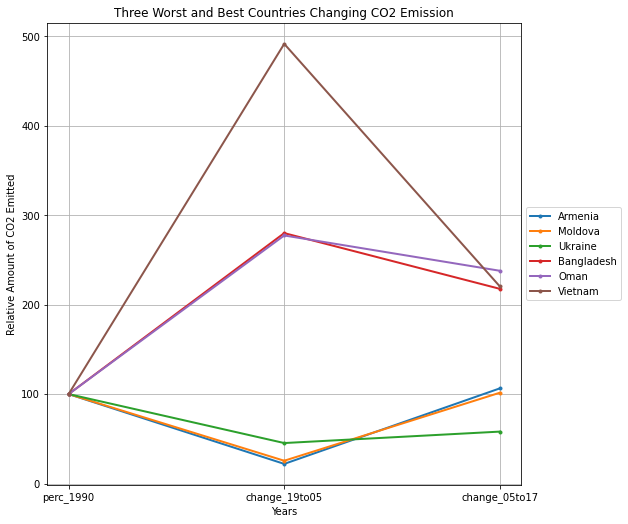

In [16]:
fig, ax = plt.subplots()

years3 = df_plot3_def.columns[1:]

for index, row in df_plot3_def.iterrows():
 plt.plot(years3, row[1:], label=row[0], marker='.', linewidth=2)

plt.title('Three Worst and Best Countries Changing CO2 Emission')
plt.xlabel('Years')
plt.ylabel('Relative Amount of CO2 Emitted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.set_size_inches(8.5, 8.5)
plt.grid()

plt.show()